**Cesar School Recife**

**Disciplina:** Modelos preditivos

**Aluno:** *Erike Simon*

Dataset do Kaggle, podendo ser encontrado em: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn import preprocessing
import missingno as msno
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import os
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb

%matplotlib inline

###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/life-expectancy-data.csv')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Renoeando colunas com espaçamentos
df.rename(columns={" BMI ":"BMI","Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS","thinness 1-19 years":"thinness_1to19_years","thinness 5-9 years":"thinness_5to9_years",
                   "Income composition of resources":"Income_Comp_Of_Resources","Total expenditure":"Tot_Exp"},inplace=True)

In [ ]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


###2. Análise exploratória
Faça uma exploração dos dados do dataset, procurando verificar:

**a)** quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;

Colunas 'Country' e 'Status' são categóricas e requerem pré-processamento

Coluna 'Country'

In [ ]:
# Criando uma instância do LabelEncoder, que é uma classe que nos ajuda a codificar rótulos categóricos em valores numéricos
le = preprocessing.LabelEncoder()

# Ajusta o codificador aos valores da coluna 'Country'. Isso permite que o codificador saiba quais rótulos estão presentes nos dados e os associe a valores numéricos específicos
le.fit(df['Country'])

# Transformando os rótulos da cluna 'Country' em valores numéricos usando o codificador e atribuindo a uma nova coluna 'Country_le'
df['Country_le'] = le.transform(df['Country'])

Cada pais está associado a uma numeração, começando com Afeganistão=0 e indo até Zimbabwe=192

In [ ]:
df.drop(columns=['Country'], inplace=True)

Coluna 'Status'

In [ ]:
le1 = preprocessing.LabelEncoder()

le1.fit(df['Status'])

df['Status_le'] = le1.transform(df['Status'])

In [ ]:
df.drop(columns=['Status'], inplace=True)

**b)** as informações estatísticas básicas das colunas do dataset;

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      2938 non-null   int64  
 1   Life_Expectancy           2928 non-null   float64
 2   Adult_Mortality           2928 non-null   float64
 3   Infant_Deaths             2938 non-null   int64  
 4   Alcohol                   2744 non-null   float64
 5   Percentage_Exp            2938 non-null   float64
 6   HepatitisB                2385 non-null   float64
 7   Measles                   2938 non-null   int64  
 8   BMI                       2904 non-null   float64
 9   Under_Five_Deaths         2938 non-null   int64  
 10  Polio                     2919 non-null   float64
 11  Tot_Exp                   2712 non-null   float64
 12  Diphtheria                2919 non-null   float64
 13  HIV/AIDS                  2938 non-null   float64
 14  GDP     

**c)** se há dados faltantes, decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


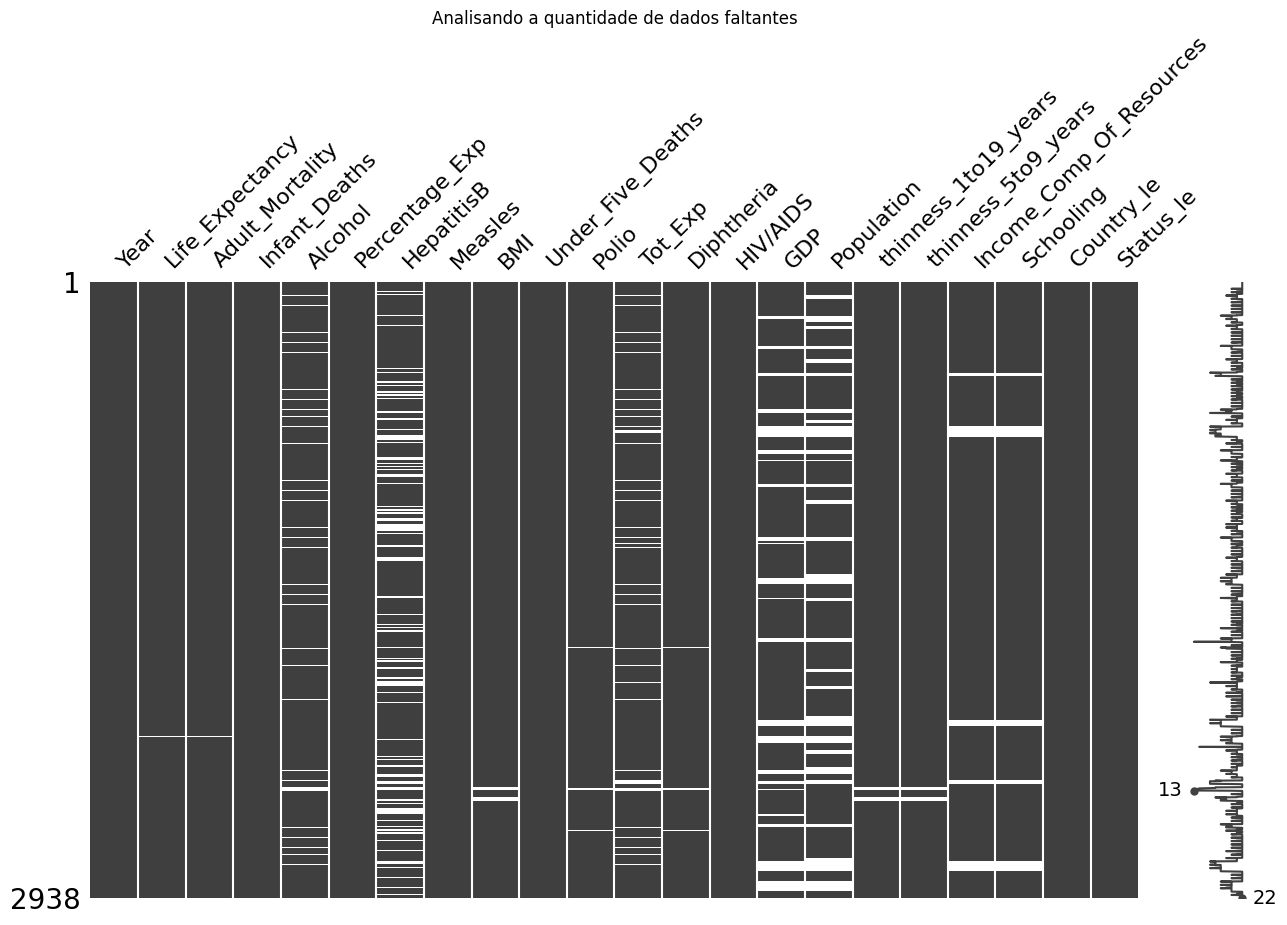

In [ ]:
msno.matrix(df, figsize=(15,8))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Gráfico 1

Porcentagem de dados nulos em cada coluna

In [ ]:
null_values_percentage = df.isnull().sum()*100/df.isnull().count()
print(round(null_values_percentage, 2))

Year                         0.00
Life_Expectancy              0.34
Adult_Mortality              0.34
Infant_Deaths                0.00
Alcohol                      6.60
Percentage_Exp               0.00
HepatitisB                  18.82
Measles                      0.00
BMI                          1.16
Under_Five_Deaths            0.00
Polio                        0.65
Tot_Exp                      7.69
Diphtheria                   0.65
HIV/AIDS                     0.00
GDP                         15.25
Population                  22.19
thinness_1to19_years         1.16
thinness_5to9_years          1.16
Income_Comp_Of_Resources     5.68
Schooling                    5.55
Country_le                   0.00
Status_le                    0.00
dtype: float64


**Tratamento dos dados nulos**

Será utilizado o método '*.interpolate()*' do pandas para tratamento dos dados nulos aplicado para cada país específico. O método, por padrão, usa a interpolação linear. Isso significa que ele assume uma relação linear entre os valores conhecidos vizinhos e estima os valores ausentes com base nessa relação.

A interpolação linear calcula a média ponderada dos valores vizinhos para preencher o valor ausente. Ela assume que os pontos de dados se encontram em uma reta reta e estima os valores intermediários nessa reta.

A fórmula geral para a interpolação linear entre dois pontos (*x1, y1*) e (*x2, y2*), com um valor *x* entre eles, é:


* *y = y1 + (x-x1) . y2-y1/x2-x1*

In [ ]:
# Lista de filtragem para tratamento dos dados nulos
country_list = df.Country_le.unique()
filter_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio',
             'Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years',
             'thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [ ]:
# 'for' para percorrer os dados filtrados por paises separadamente
for country in country_list:
    df.loc[df['Country_le'] == country,filter_list] = df.loc[df['Country_le'] == country,filter_list].interpolate()

# dropando valores nulos remanescentes
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1987 non-null   int64  
 1   Life_Expectancy           1987 non-null   float64
 2   Adult_Mortality           1987 non-null   float64
 3   Infant_Deaths             1987 non-null   int64  
 4   Alcohol                   1987 non-null   float64
 5   Percentage_Exp            1987 non-null   float64
 6   HepatitisB                1987 non-null   float64
 7   Measles                   1987 non-null   int64  
 8   BMI                       1987 non-null   float64
 9   Under_Five_Deaths         1987 non-null   int64  
 10  Polio                     1987 non-null   float64
 11  Tot_Exp                   1987 non-null   float64
 12  Diphtheria                1987 non-null   float64
 13  HIV/AIDS                  1987 non-null   float64
 14  GDP     

In [ ]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Country_le,Status_le
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,...,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054,91.367388,0.856568
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,...,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964,55.280971,0.350601
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,...,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000,41.000000,1.000000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,...,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000,92.000000,1.000000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,...,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000,135.000000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000,192.000000,1.000000


Observa-se que as médias e desvios padrões entre as colunas possuem ordem de grandezas distintas, o que é um indicativo de uma necessária normalização dos dados.

Boxplot do dataset

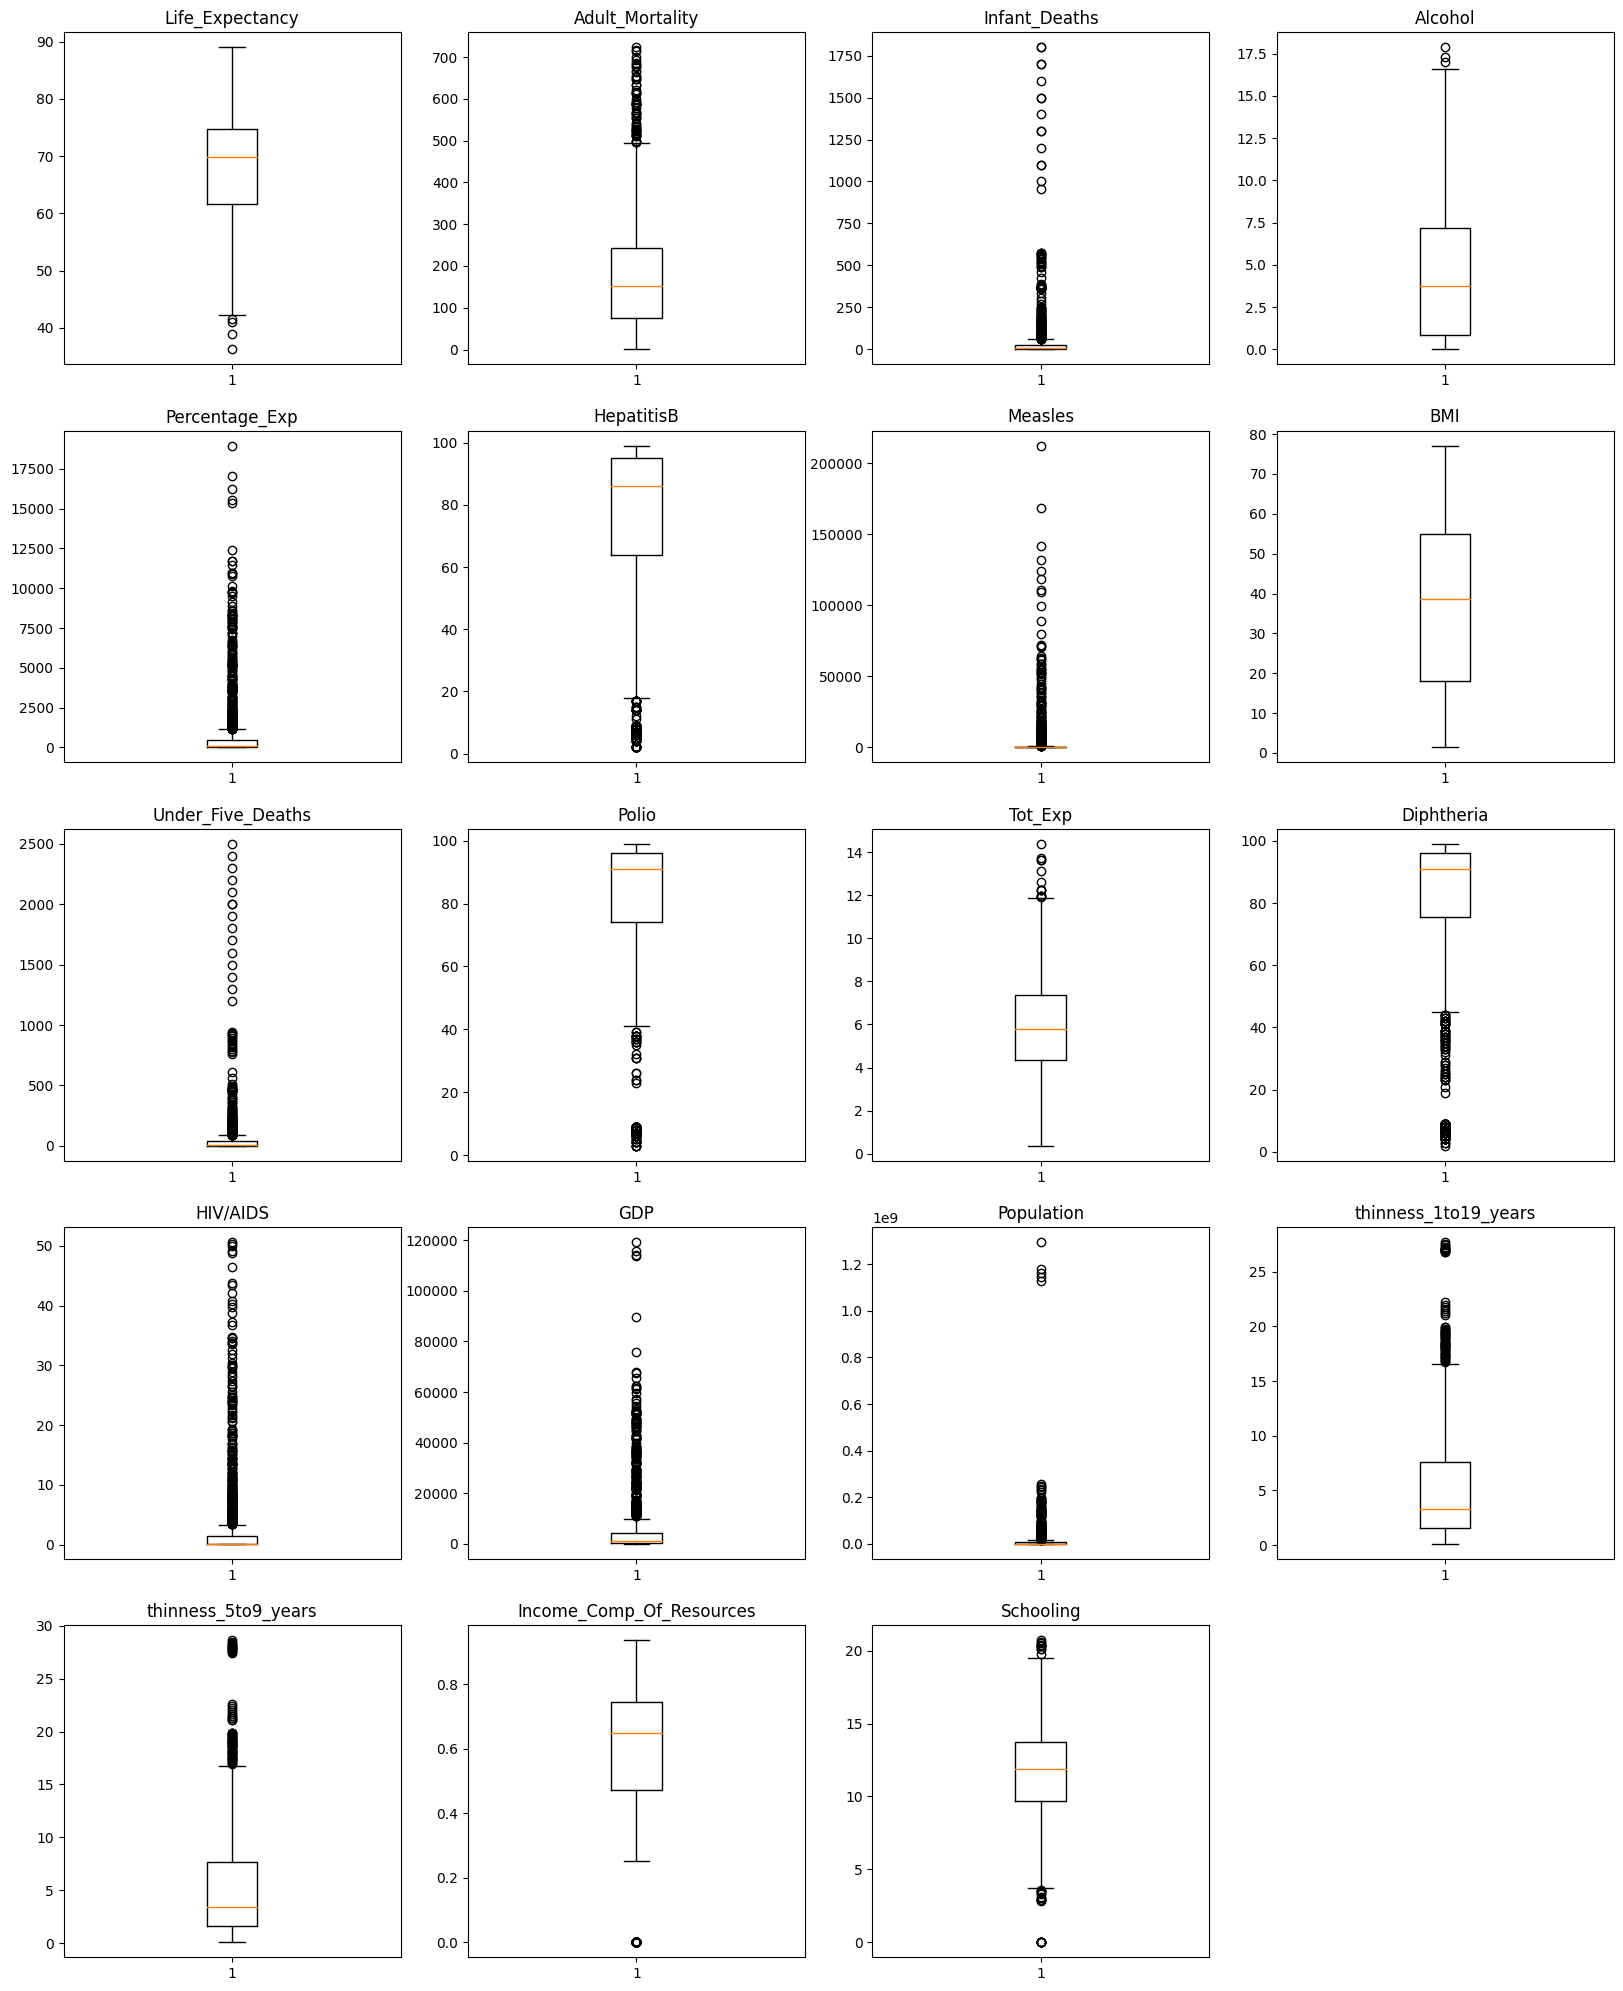

In [ ]:
# Cria um dicionário para as colunas
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,
            'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,
            'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Observando a distribuição dos dados através dos boxplots individuais
plt.figure(figsize=(20,25))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

Gráfico 2

**d)** a matriz de correlação das entradas com a saída;

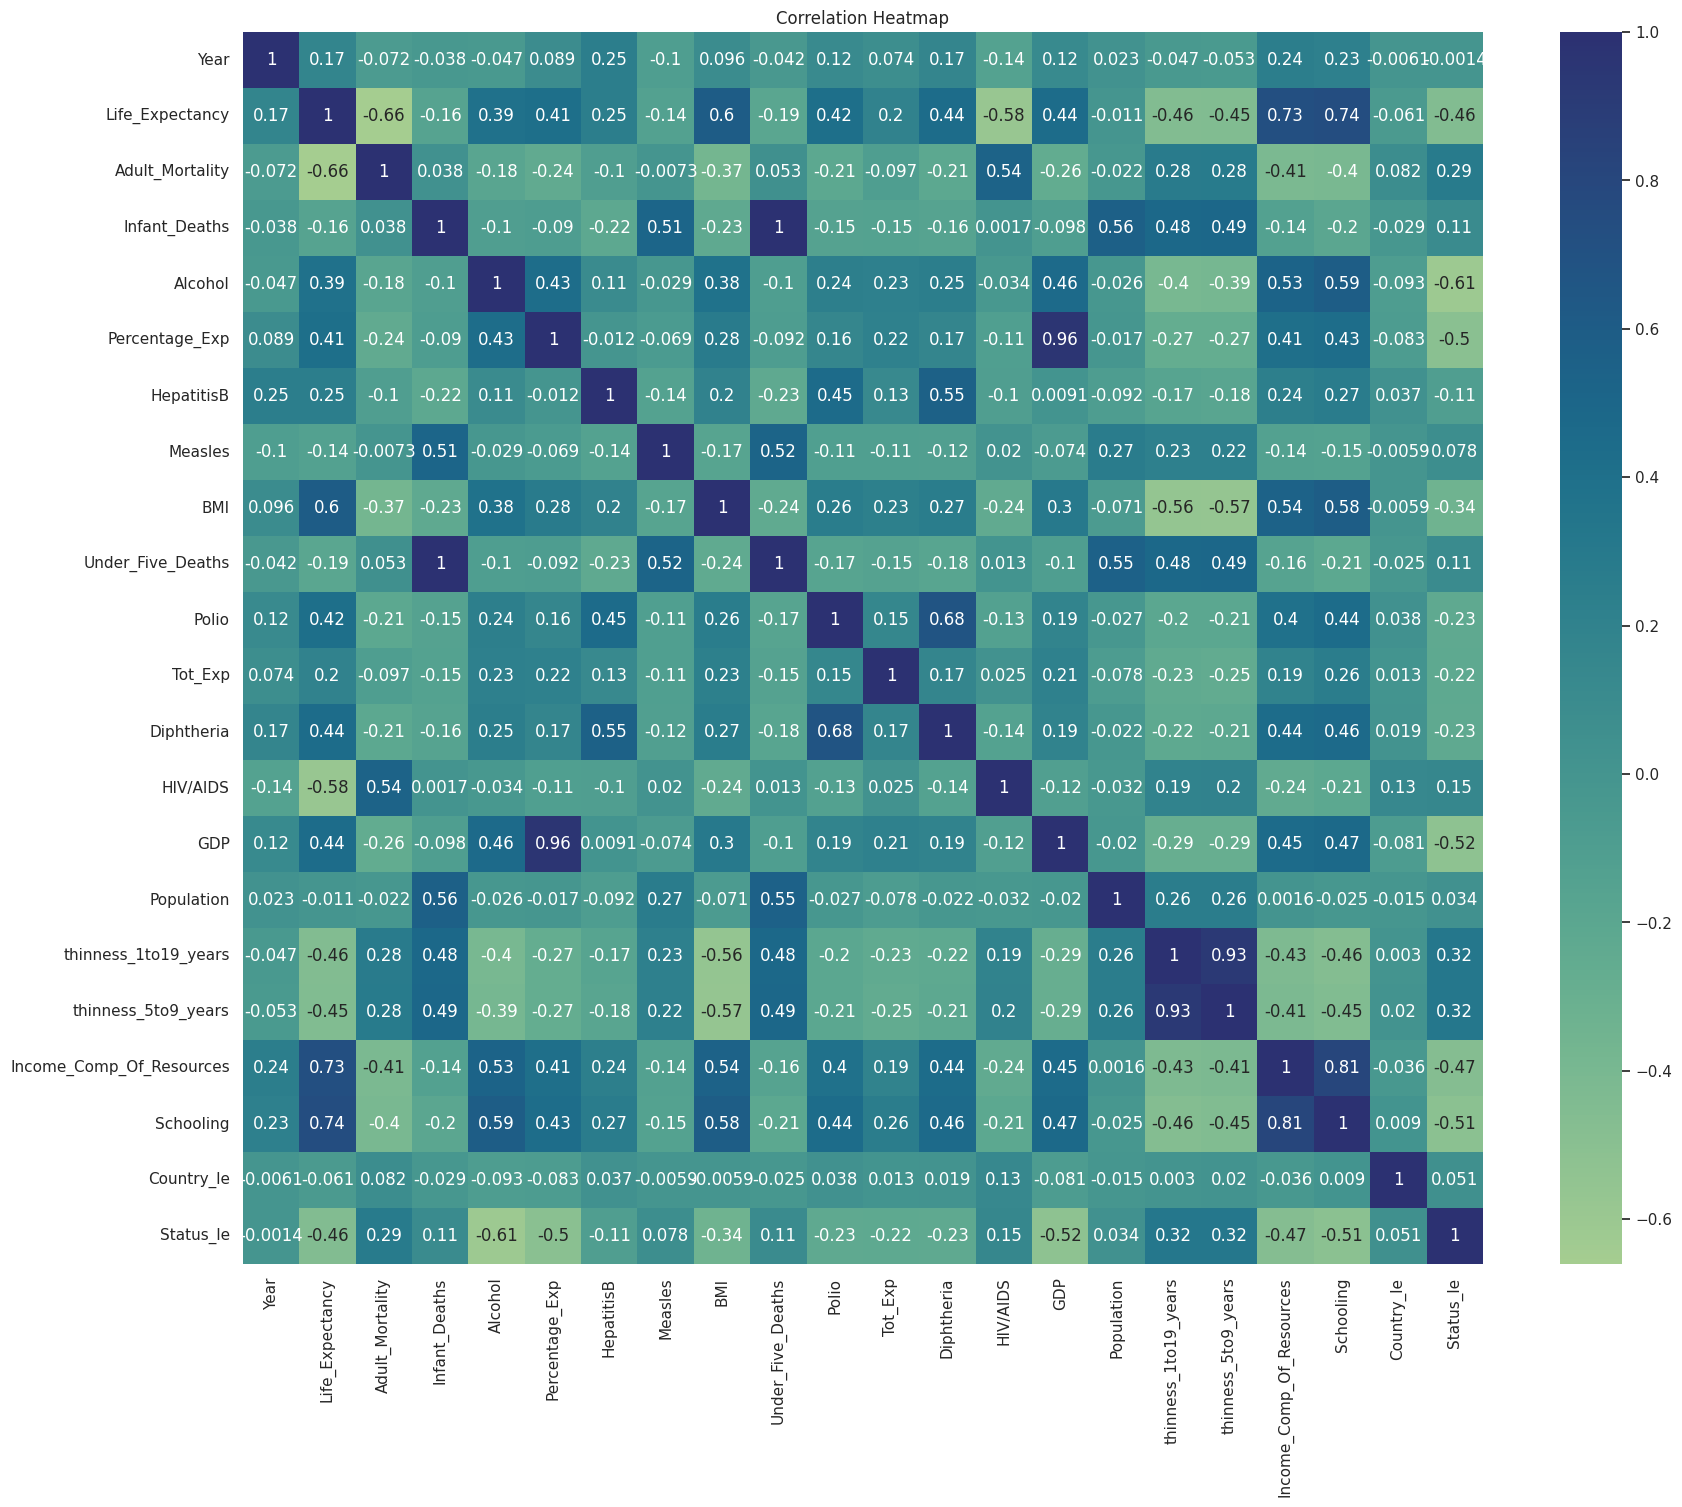

In [ ]:
# Criação do heatmap usando o Seaborn
sns.set()
plt.figure(figsize=(20, 16))

# Plot do heatmap
sns.heatmap(df.corr(), cmap="crest", annot=True)

plt.title('Correlation Heatmap')
plt.show()

Gráfico 3

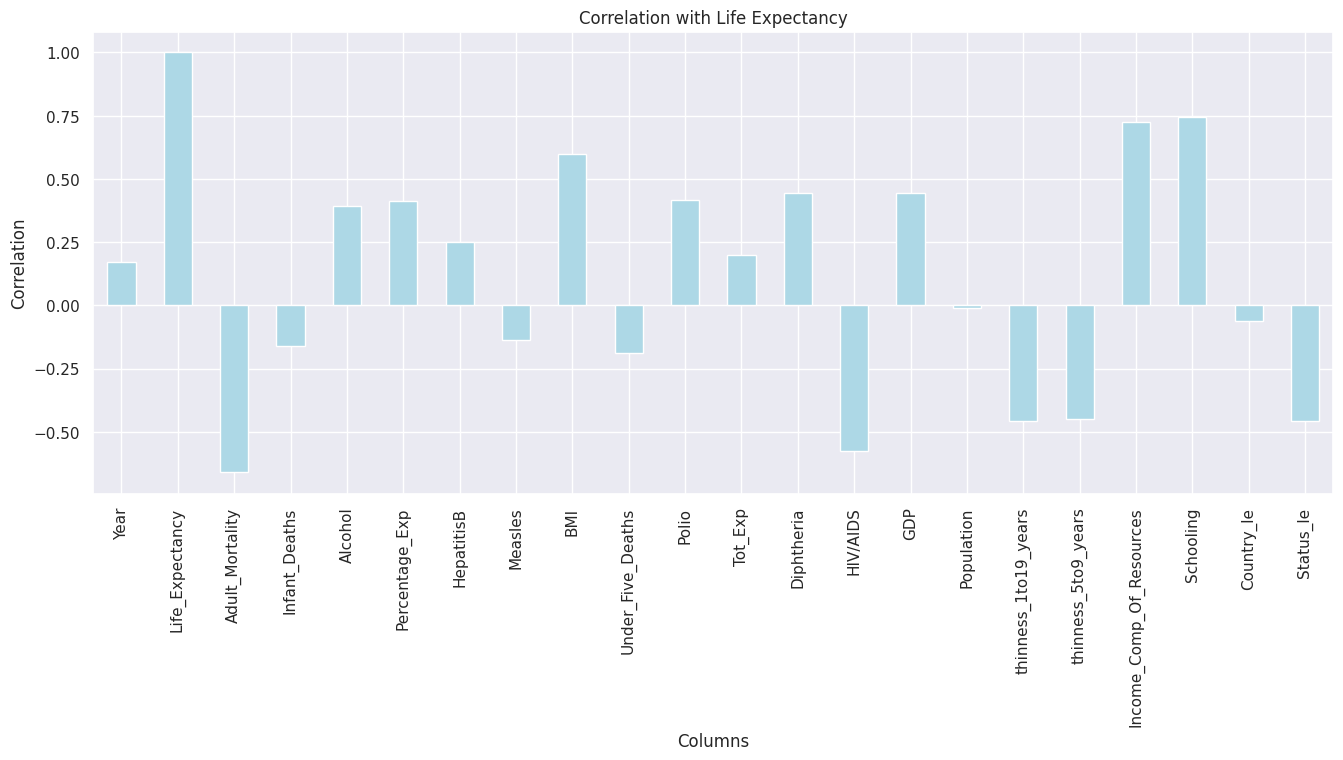

In [ ]:
# Selecionar a coluna de interesse para a correlação
column_of_interest = 'Life_Expectancy'

# Calcular a correlação entre a coluna de interesse e todas as outras colunas
correlation = df.corrwith(df[column_of_interest])

# Criação do gráfico de barra da correlação
plt.figure(figsize=(16, 6))
correlation.plot(kind='bar', color='lightblue')
plt.title(f'Correlation with Life Expectancy')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

Gráfico 4

In [ ]:
correlation

Year                        0.171485
Life_Expectancy             1.000000
Adult_Mortality            -0.660529
Infant_Deaths              -0.160922
Alcohol                     0.392617
Percentage_Exp              0.413683
HepatitisB                  0.249625
Measles                    -0.138133
BMI                         0.599572
Under_Five_Deaths          -0.187438
Polio                       0.415188
Tot_Exp                     0.199288
Diphtheria                  0.442943
HIV/AIDS                   -0.576373
GDP                         0.443612
Population                 -0.010840
thinness_1to19_years       -0.458724
thinness_5to9_years        -0.450095
Income_Comp_Of_Resources    0.726753
Schooling                   0.744703
Country_le                 -0.060918
Status_le                  -0.457526
dtype: float64

**e)** quais as features que mais possuem correlação (negativamente ou positivamente) com a saída?

As features que mais possuem correlação positiva com a expectativa de vida (*target*) são:

* *Schooling: número de anos de escolaridade;*
* *Incoming Composition of Resources: índice de desenvolvimento humano em termos de composição do rendimento dos recursos;*
* *BMI*: índice de massa corporal médio de toda a população.

E as features que mais possuem correlação negativa são:

* *Adult Mortality: taxas de mortalidade de adultos de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes);*
* *HIV/AIDS: mortes por 1000 de nascidos vivos (0-4 anos);*
* *Status: países desenvolvidos ou em desenvolvimento. No caso, os dados mostram uma correlação negativa em relação aos países em desenvolvimento. Devido a aplicação do Label Encoder, países em desenvolvimento possuem valor 1 na coluna 'status_le'.*

**f)** com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

* **GDP** (produto interno bruto per capita) e **Percentage_Exp** (Despesas com saúde em percentagem do produto interno bruto per capita) possuem correlação entre si de 0.96;
* **Under_Five_Deaths** (Número de mortes de menores de cinco anos por 1000 habitantes) e **Infant_Deaths** (mortalidade infantil por 1000 habitantes) possuem correlação de 1.0.

**g)** com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

Com relação e *GDP* e *Percentage_Exp*, a remoção desta última seria mais adequada, uma vez que possui correlação menos significativa com a expectativa de vida (0.41) do que *GDP* (0.44).

Em relação a *Under_Five_Deaths* e *Infant_Deaths*, pelo mesmo motivo acima, a remoção de *Infant_Deaths* seria mais adequada, uma vez que possui correlação negativa um pouco menos significativa com a expectativa de vida (-0.16), apesar desta correlação ser muito fraca.

A remoção das *features* que possuem correlações mais fracas com o *target* se justifica porque em uma matriz de correlação, as *features* que possuem correlações mais fracas em relação ao *target* tendem a ter menos influência na predição dos seus valores.

**h)** com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

 A matriz de correlação não captura todas as nuances das relações entre as variáveis. No entanto, observa-se pelo gráfico acima (*Correlation with Life Expectancy*) que existem algumas *features* com correlações significativas em relação ao *target*, o que é um indicativo de uma relação linear forte entre estas. Correlações significativas têm o potencial de fornecer informações úteis para predição, mas para avaliar verdadeiramente a capacidade de predição das *features*, é preciso construir modelos de ML para verificar o desempenho deste em um conjunto de teste independente.

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [ ]:
df.columns

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles', 'BMI',
       'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS',
       'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years',
       'Income_Comp_Of_Resources', 'Schooling', 'Country_le', 'Status_le'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Life_Expectancy']),
                                                    df['Life_Expectancy'],
                                                    test_size=0.3,
                                                    random_state=111)

###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [ ]:
sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

###Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

Utilizando o modelo de regressão com KNN

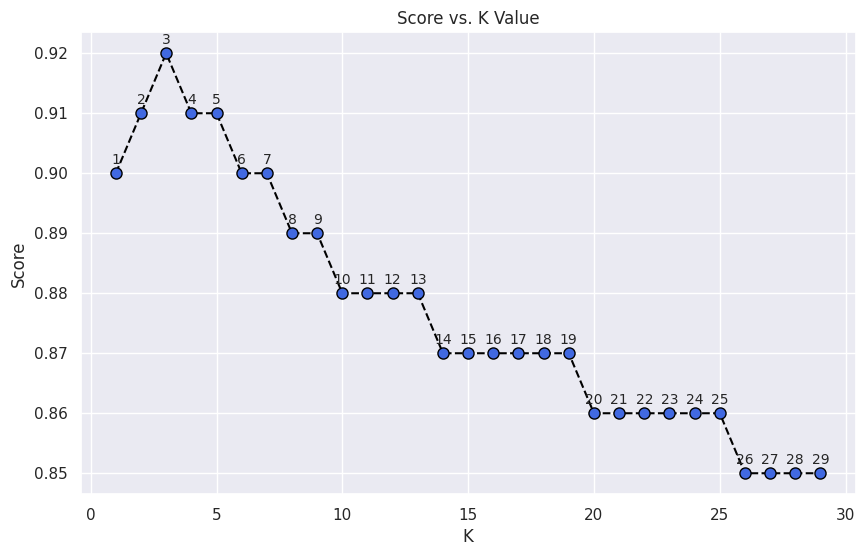

In [ ]:
# Avalia os scores para cada valor de K
score = []

for i in range(1,30):
  # treine o modelo
  reg_knn = KNeighborsRegressor(n_neighbors=i)
  reg_knn.fit(X_train_scaled, y_train)

  ## calcule as métricas
  scores = reg_knn.score(X_test_scaled, y_test)

  # armazene na lista score
  score.append(round(scores,2))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='black', linestyle='dashed', marker='o',
         markerfacecolor='royalblue', markersize=8)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

# Adicionar os valores do eixo x acima de cada marcador
for i, err in enumerate(score):
    plt.text(i+1, err + 0.001, str(i+1), ha='center', va='bottom', fontsize=10)

plt.show()

Gráfico 5

De acordo com o gráfico acima, o melhor *score* do modelo (*R²*, coeficiente de determinação) foi obtivo para *k*=3.

In [ ]:
reg_knn_k3 = KNeighborsRegressor(n_neighbors=3)
reg_knn_k3.fit(X_train_scaled, y_train)

y_train_pred_k3 = reg_knn_k3.predict(X_train_scaled)
y_test_pred_k3 = reg_knn_k3.predict(X_test_scaled)

In [ ]:
# com o melhor valor de k
R_train_k3 = reg_knn_k3.score(X_train_scaled, y_train)
R_test_k3 = reg_knn_k3.score(X_test_scaled, y_test)

print("R² treino para K=3: %0.2f \nR² teste para K=3: %0.2f" %(R_train_k3, R_test_k3))

R² treino para K=3: 0.96 
R² teste para K=3: 0.92


####Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

##### Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

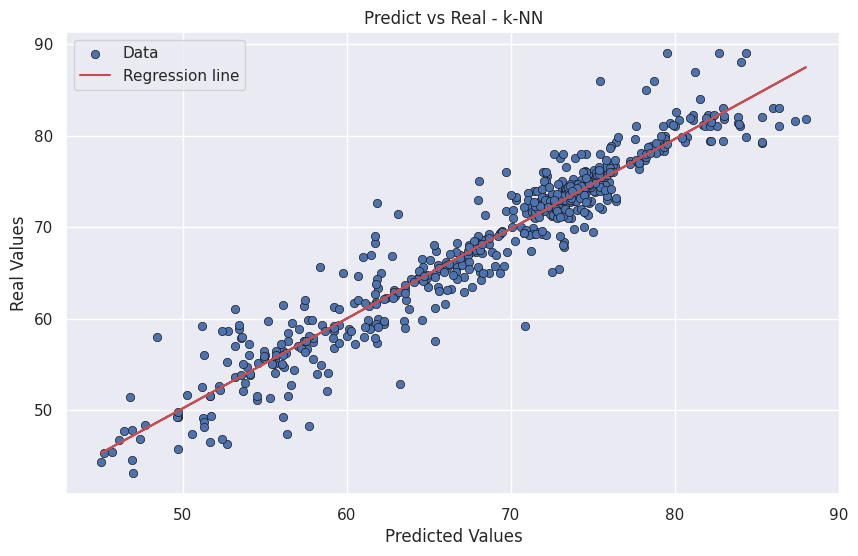

In [ ]:
# Calcula a reta de regressão
slope, intercept = np.polyfit(y_test_pred_k3, y_test, 1)
y_regression = np.polyval([slope, intercept], y_test_pred_k3)

# Criar o gráfico de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_k3, y_test, edgecolors='k', linewidth=0.5, label='Data')
plt.plot(y_test_pred_k3, y_regression, color='r', label='Regression line')
plt.title('Predict vs Real - k-NN')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.legend()

plt.show()

Gráfico 6

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

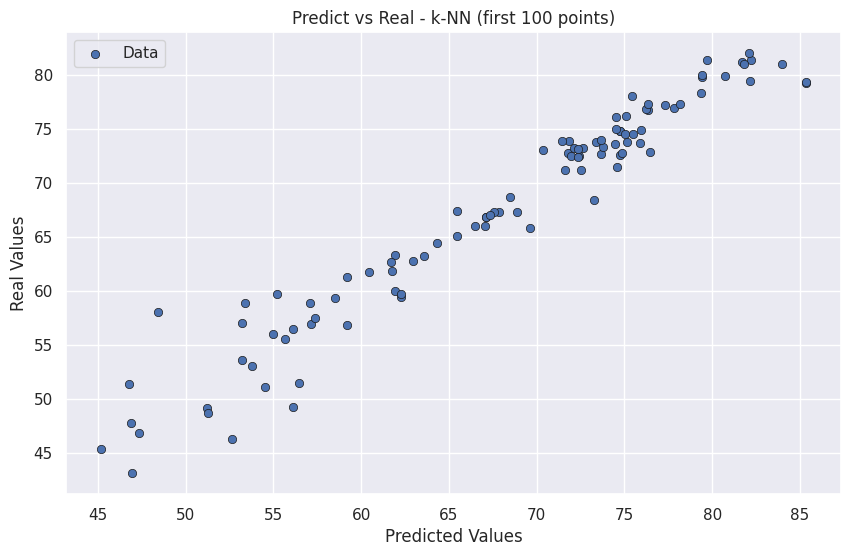

In [ ]:
# Cria o gráfico de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_k3[:100], y_test[:100], edgecolors='k', linewidth=0.5, label='Data')
plt.title('Predict vs Real - k-NN (first 100 points)')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.legend()

plt.show()

Gráfico 7

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito).

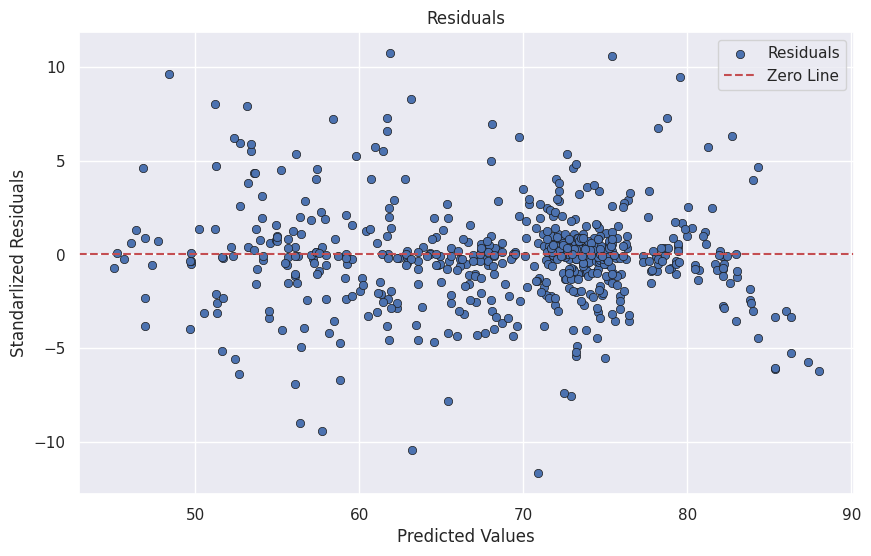

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_pred_k3, y_test - y_test_pred_k3, edgecolors='k', linewidth=0.5, label='Residuals')
plt.title('Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Standarlized Residuals')

# Add a dashed line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

plt.legend()
plt.show()

Gráfico 8

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

Observa-se a partir das visualizações dos dados reais e preditos e do R² para os dados de treino e teste que o modelo consegue predizer bem a expectativa de vida.

##### Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (MEAN, MAPE, MSE, RMSE e R²) e verifique se sua impressão visual se confirma.

In [ ]:
# Função para cálculo de métricas
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [ ]:
# Dados de treino
print("Dados de treino:\n")
print_metrics(y_train, y_train_pred_k3)

Dados de treino:

MEAN:  1.249640287769784
MAPE:  0.01939421467159794
MSE:  4.302754596322941
RMSE:  18.5136971161782
R²:  0.9561823155460072


In [ ]:
# Dados de teste
print("Dados de teste:\n")
print_metrics(y_test, y_test_pred_k3)

Dados de teste:

MEAN:  1.7589056393076492
MAPE:  0.02683625869489153
MSE:  7.04466778336125
RMSE:  49.62734417792791
R²:  0.9165012880694691


A partir das demais métricas de avaliação, é possível averiguar que de fato o modelo possue um bom desempenho na predição da expectativa de vida.

##### Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R² com 10 folds (parametro cv=10) para avaliar o modelo.

In [ ]:
# Cria um modelo knn para regressão novo
neigh_cross = KNeighborsRegressor(n_neighbors=3)

# Aplica a validação cruzada com 10 folds (dobras)
scores_cv = cross_val_score(neigh_cross, X_train_scaled, y_train, cv=10) # 'cv': número de folds
scores_cv

array([0.88250572, 0.83675372, 0.8695468 , 0.93031069, 0.84925054,
       0.87801811, 0.8640322 , 0.90662236, 0.90344849, 0.90662719])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_cv.mean(), scores_cv.std() * 2))

Accuracy: 0.88 (+/- 0.06)


## Extra
###XGBoost

Use o modelo XGBoost para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor()  # For regression
model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb_train = model_xgb.predict(X_train_scaled)
y_pred_xgb_test = model_xgb.predict(X_test_scaled)

####Avaliação do XGBoost
Crie gráficos de linha para visualizar a performance do modelo.

##### Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

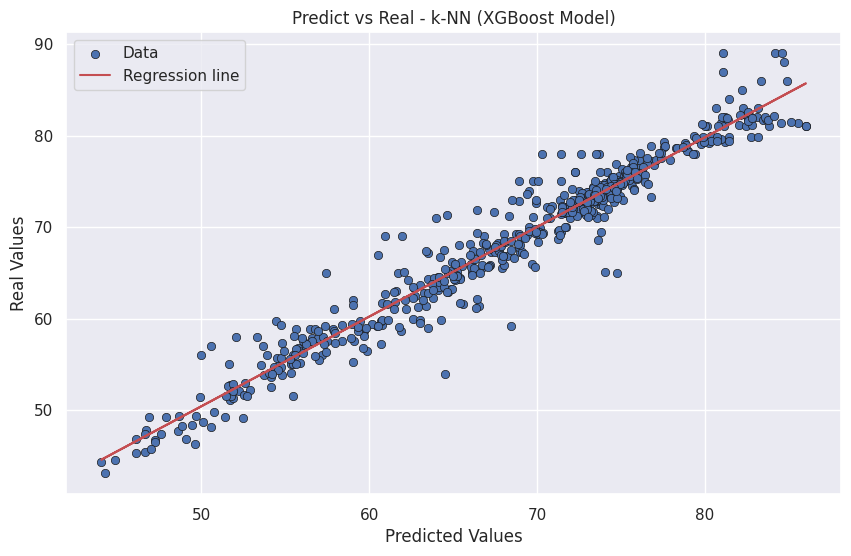

In [ ]:
# Calcula a reta de regressão
slope, intercept = np.polyfit(y_pred_xgb_test, y_test, 1)
y_regression = np.polyval([slope, intercept], y_pred_xgb_test)

# Criar o gráfico de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb_test, y_test, edgecolors='k', linewidth=0.5, label='Data')
plt.plot(y_pred_xgb_test, y_regression, color='r', label='Regression line')
plt.title('Predict vs Real - k-NN (XGBoost Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.legend()

plt.show()

Gráfico 9

Para facilitar a visualização, faça um gráfico apenas dos 100 pontos.

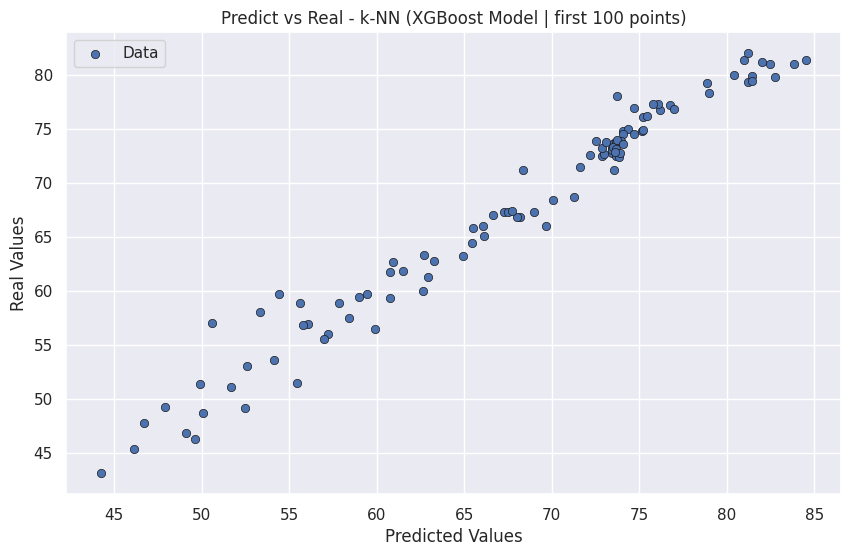

In [ ]:
# Criar o gráfico de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb_test[:100], y_test[:100], edgecolors='k', linewidth=0.5, label='Data')
plt.title('Predict vs Real - k-NN (XGBoost Model | first 100 points)')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.legend()

plt.show()

Gráfico 10

Agora, faça um gráfico exibindo o erro entre os pontos dos resíduos, i.e., valor real - valor predito.

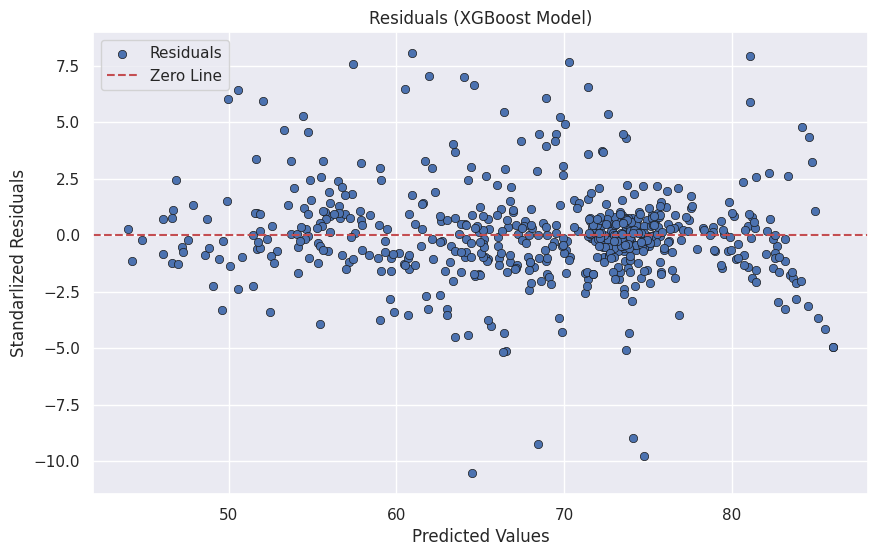

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred_xgb_test, y_test - y_pred_xgb_test, edgecolors='k', linewidth=0.5, label='Residuals')
plt.title('Residuals (XGBoost Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Standarlized Residuals')

# Add a dashed line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

plt.legend()
plt.show()

Gráfico 11

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

Observa-se uma nítida maior aglutinação dos pontos em torno da reta de regressão com relação ao gráfico do modelo anterior e a partir das métricas abaixo, nota-se uma melhor eficiência na predição da expectativa de vida.

##### Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (MEAN, MAPE, MSE, RMSE e R²) e verifique se sua impressão visual se confirma.

In [ ]:
# Dados de treino
print("Dados de treino:\n")
print_metrics(y_train, y_pred_xgb_train)

Dados de treino:

MEAN:  0.11578627332508998
MAPE:  0.0017274483968545025
MSE:  0.027019195026975192
RMSE:  0.000730036899905721
R²:  0.9997248463663476


In [ ]:
# Dados de teste
print("Dados de teste:\n")
print_metrics(y_test, y_pred_xgb_test)

Dados de teste:

MEAN:  1.3827318047758321
MAPE:  0.020711643632724437
MSE:  4.423408261869455
RMSE:  19.566540651174954
R²:  0.9475704314855938


A impressão visual se confirma através das métricas, tendo o modelo *XGBoost* um melhor desempenho em todas estas em relação ao modelo anterior.

##### Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [ ]:
# Criar um modelo XGBoost novo
cross_xgb = xgb.XGBRegressor()  # XGBoost para regressão

# Aplica a validação cruzada com 10 folds (dobras)
scores_xgb_cv = cross_val_score(cross_xgb, X_train_scaled, y_train, cv=10) # 'cv': número de folds
scores_xgb_cv

array([0.94245108, 0.96215967, 0.9422313 , 0.96555294, 0.93448053,
       0.96665858, 0.9559245 , 0.957439  , 0.94815523, 0.95630207])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_xgb_cv.mean(), scores_xgb_cv.std() * 2))

Accuracy: 0.95 (+/- 0.02)


## Conclusão

O modelo de regressão escolhido foi o *KNN Regressor*. Inicialmente, foi avaliado o *score* para números *K* de vizinhos variando de 1 a 29. O melhor desempenho obtido foi para *K*=3 e pode ser observado no  através do gráfico 5 (*Score vc. K Value*). A partir do gráfico 6 (*Predict VC Real -K-NN*) observa-se uma nítida tendência dos pontos a se acomodarem na reta de regressão. Os resíduos para esse modelo podem ser observados no gráfico 8 e as métricas de avaliação foram as seguintes:

**Dados de treino:**

* *MEAN:*  1.249640287769784
* *MAPE:*  0.01939421467159794
* *MSE:*  4.302754596322941
* *RMSE:*  18.5136971161782
* *R²:*  0.9561823155460072

**Dados de teste:**

* *MEAN:*  1.7589056393076492
* *MAPE:*  0.02683625869489153
* *MSE:*  7.04466778336125
* *RMSE:*  49.62734417792791
* *R²:*  0.9165012880694691

Ao aplicar o *Cross Validation* a este modelo, obtemos uma acurácia de 0.88 e desvio padrão de +/- 0.06.

Ao aplicar o modelo *XGBoost* aos dados para a predição da expectativa de vida, pode-se observar através do gráfico 9 uma tendência ainda maior de aglomeração dos pontos em torno da reta de regressão. Os resíduos para este modelo podem ser observados no gráfico 11 e suas métricas de avaliação foram:

**Dados de treino:**

* *MEAN:*  0.11578627332508998
* *MAPE:*  0.0017274483968545025
* *MSE:*  0.027019195026975192
* *RMSE:*  0.000730036899905721
* *R²:*  0.9997248463663476

**Dados de teste:**

* *MEAN:*  1.3827318047758321
* *MAPE:*  0.020711643632724437
* *MSE:*  4.423408261869455
* *RMSE:*  19.566540651174954
* *R²:*  0.9475704314855938

Ao aplicar o *Cross Validation* a este modelo, obtemos uma acurácia de 0.95 e desvio padrão de +/- 0.02.

Ao comparar as métricas e gráficos de ambos os modelos para a predição da expectativa de vida, observa-se uma superioridade do modelo *XGBoost* em todas as métricas de avaliação tanto para os dados de treino como para os dados de teste.

O *XGBoost* é um algoritmo de aprendizado de máquina que se destaca por sua eficiência e desempenho em várias tarefas de regressão e classificação. Sua eficácia é resultado de várias características que o tornam uma escolha poderosa para muitos problemas:

1. **Regularização Avançada:** inclui regularização L1 (Lasso) e L2 (Ridge) para evitar overfitting, o que ajuda a prevenir o ajuste excessivo dos dados de treinamento.

2. **Processamento Paralelo e Distribuído:** é otimizado para ser altamente eficiente em termos de tempo de processamento. Ele aproveita processamento paralelo e pode ser distribuído em clusters para lidar com grandes conjuntos de dados.

3. **Algoritmo de Aprendizado em Árvores:** utiliza árvores de decisão como base de seu modelo. As árvores de decisão são capazes de capturar relacionamentos complexos entre variáveis e segmentar o espaço de recursos de maneira eficaz.

4. **Regularização Gradient Boosting:** utiliza o método Gradient Boosting, que treina várias árvores sequencialmente, com cada nova árvore tentando corrigir os erros das anteriores. Isso melhora a capacidade de aprendizado do modelo.

5. **Tratamento de Valores Ausentes:** possui maneiras eficazes de lidar com valores ausentes nos dados, evitando a exclusão de instâncias que possuem recursos ausentes.

6. **Seleção Automática de Recursos:** pode avaliar a importância de cada recurso para a predição e, assim, selecionar automaticamente os recursos mais relevantes para o problema.

7. **Funções de Perda Customizáveis:** permite customizar as funções de perda para diferentes tipos de problemas, como regressão e classificação.

8. **Crescimento de Árvores Profundas:** pode crescer árvores mais profundas do que outros métodos de boosting, permitindo que o modelo capture mais detalhes e padrões complexos nos dados.

9. **Hiperparâmetros Ajustáveis:** oferece muitos hiperparâmetros ajustáveis, o que possibilita a configuração do modelo de acordo com as características específicas do problema.

10. **Desempenho Comprovado em Competições:** demonstrou consistentemente alto desempenho em competições de ciência de dados e aprendizado de máquina, como o Kaggle.

Todas essas características contribuem para que o *XGBoost* seja eficaz na predição e seja frequentemente a escolha preferida para uma variedade de problemas de análise de dados.